# Exercise 6.2

### Contents:

#### 1. Importing Visualization Libraries and Data
#### 2. Data Cleaning
#### 3. Exploring Relationships
    * Correlations
    * Scatterplots
    * Pair Plots
    * Categorical Plots
#### 4. Answers to Initial Questions
#### 5. New Questions 
#### 6. Hypothesis for Testing

# 1. Importing Visualization Libraries and Data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [10]:
# setting path

path = r'/Users/shikhakamboj/Documents/Part-6 Achievement 6'

# import data 

df_cleaned_data = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'flavors_of_cacao_cleaned.csv'), index_col = 0)

In [12]:
df_cleaned_data.head()

,Company,Specific_Bean_Origin,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
0,A. Morin,Agua Grande,2016,63.0,France,3.75,Unknown,Sao Tome
1,A. Morin,Kpime,2015,70.0,France,2.75,Unknown,Togo
2,A. Morin,Atsane,2015,70.0,France,3.00,Unknown,Togo
3,A. Morin,Akata,2015,70.0,France,3.50,Unknown,Togo
4,A. Morin,Quilla,2015,70.0,France,3.50,Unknown,Peru


# 2. Data Cleaning

In [25]:
# Check for missing value

df_cleaned_data.isnull().sum()

Company                 0
Specific_Bean_Origin    0
Review_Date             0
Cocoa_Percent           0
Company_Location        0
Rating                  0
Bean_Type               0
Broad_Bean_Origin       0
dtype: int64

No missing values in the dataset.

In [27]:
df_cleaned_data.dtypes

Company                  object
Specific_Bean_Origin     object
Review_Date               int64
Cocoa_Percent           float64
Company_Location         object
Rating                  float64
Bean_Type                object
Broad_Bean_Origin        object
dtype: object

Data types look correct

In [31]:
# Finding Duplicates

df_dups = df_cleaned_data[df_cleaned_data.duplicated()]
df_dups

,Company,Specific_Bean_Origin,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin


No duplicates found in the dataset.

In [40]:
# Checking for Mixed-Type Data

for col in df_cleaned_data.columns.tolist():
      weird = (df_cleaned_data[[col]].map(type) != df_cleaned_data[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df_cleaned_data[weird]) > 0:
        print (col)

No mixed-type columns are present.

# 3. Exploring Relationships

### Correlations

In [48]:
# Selecting only numeric columns for correlation calculation

numeric_df = df_cleaned_data.select_dtypes(include=['number'])

In [54]:
# Create a correlation matrix

corr_matrix = numeric_df.corr()
corr_matrix

,Review_Date,Cocoa_Percent,Rating
Review_Date,1.000000,0.040168,0.105189
Cocoa_Percent,0.040168,1.000000,-0.143415
Rating,0.105189,-0.143415,1.000000


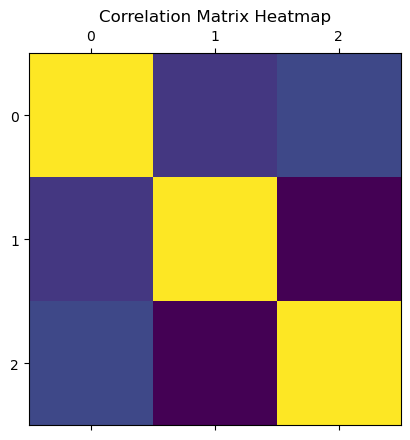

In [58]:
# Create a correlation heatmap using matplotlib

plt.matshow(corr_matrix)
plt.title("Correlation Matrix Heatmap")
plt.show()

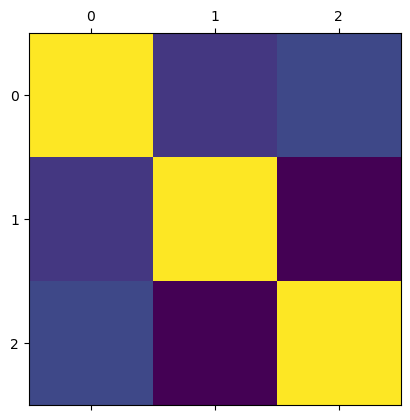

In [64]:
# Save figure

plt.matshow(corr_matrix)
plt.savefig("corr_matrix_heatmap.png") 

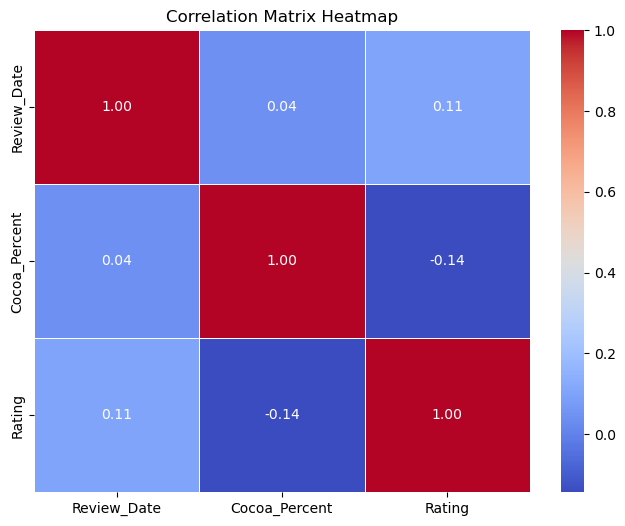

In [66]:
# Adding Lables, legends, and change the size of heatmap

# Set the figure size
plt.figure(figsize=(8, 6))

# Create the heatmap with annotations
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add a title
plt.title('Correlation Matrix Heatmap')

plt.show()

### Interpretation of the Correlation Matrix Heatmap

##### The heatmap displays the correlation coefficients between three key numerical variables: Rating, Cocoa_Percent, and Review_Date. The  correlation coefficient (r) ranges from -1 to 1, where:
        +1 indicates a perfect positive correlation.
        -1 indicates a perfect negative correlation.
         0 means no correlation.

### Observations:  
##### Cocoa_Percent vs. Rating (-0.14) -> Slight negative correlation, meaning chocolates with higher cocoa content tend to have slightly lower ratings.
##### Review_Date vs. Rating (0.11) -> Weak positive correlation, indicating that ratings have slightly increased over time.
##### Review_Date vs. Cocoa_Percent (0.04) -> Near-zero correlation, suggesting that cocoa content in chocolates has remained stable over time.

### Scatterplots

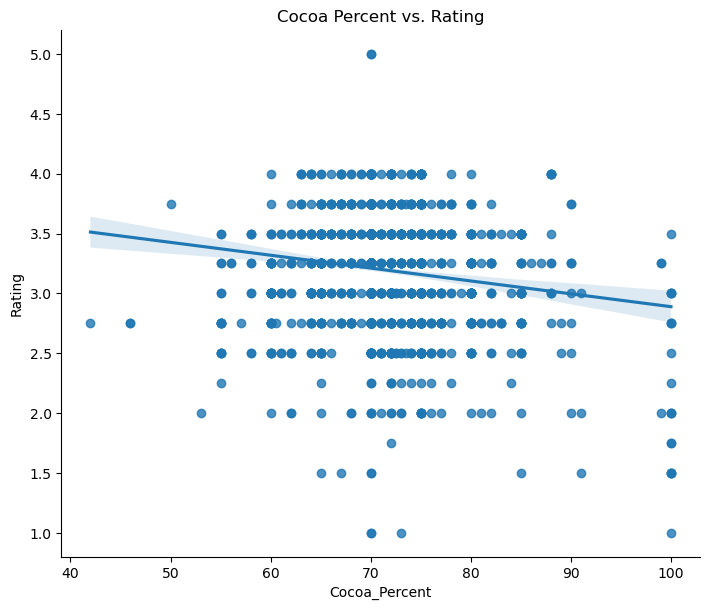

In [95]:
# Create a Scatterplot for Cocoa Percentage and Rating

# Create scatterplot
sns.lmplot(x='Cocoa_Percent', y='Rating', data=df_cleaned_data, height=6, aspect=1.2)

# Add a title
plt.title('Cocoa Percent vs. Rating')

plt.show()

### Observations:
The scatterplot shows a slight negative correlation between cocoa percentage and rating. The regression line slopes downward, indicating that higher cocoa percentages (e.g., darker chocolates) tend to receive slightly lower ratings.

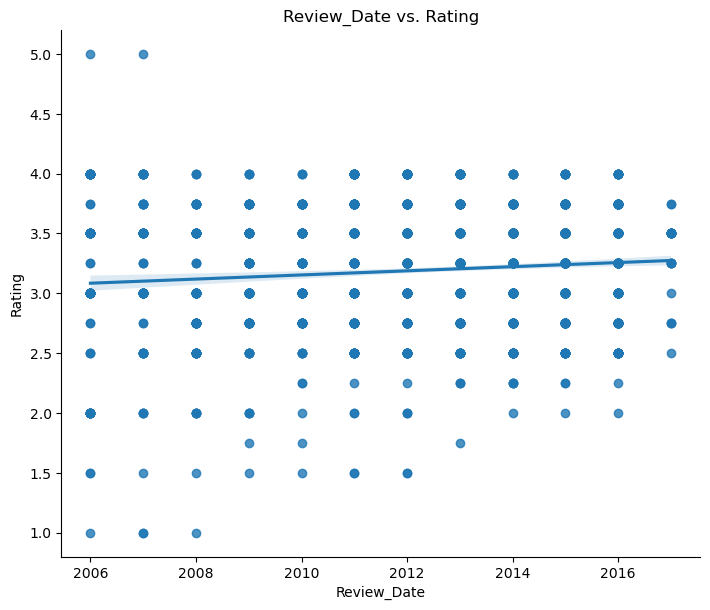

In [98]:
# Create a Scatterplot for Review_Date vs. Rating

# Create scatterplot
sns.lmplot(x='Review_Date', y='Rating', data=df_cleaned_data, height=6, aspect=1.2)

# Add a title
plt.title('Review_Date vs. Rating')

plt.show()

### Observations:
The scatterplot shows a slight positive correlation between review_date and rating. The regression line slopes upward, suggesting that ratings have gradually improved over the years.

### Pair Plots

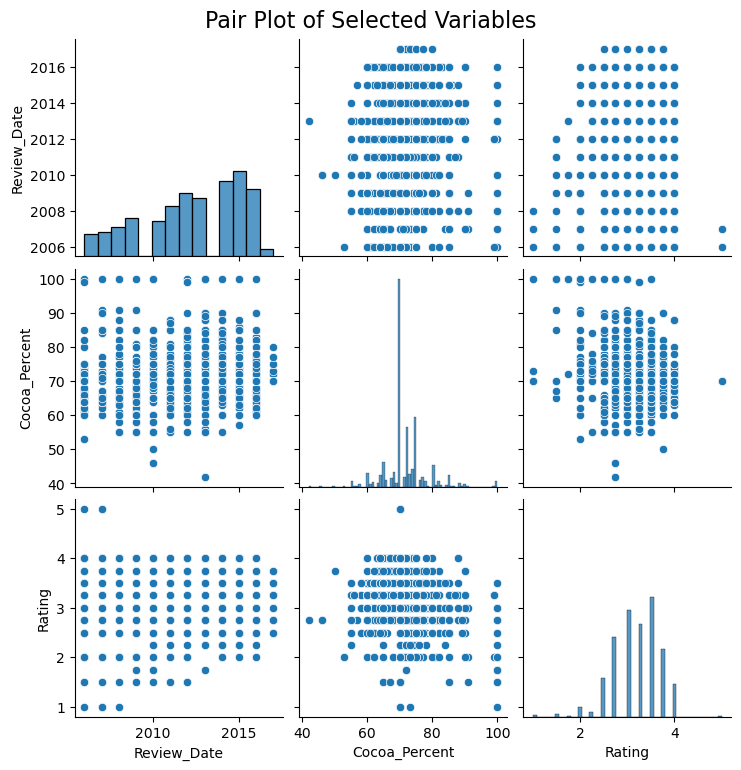

In [104]:
# Create the pair plot

pair_plot = sns.pairplot(numeric_df)

plt.suptitle('Pair Plot of Selected Variables', y=1.02, fontsize=16)

plt.show()

### Comments on Distribution:
##### Review_Date: Reviews increased from 2006 to 2016.
##### Cocoa_Percent: Most chocolates fall between 60-80% cocoa.
##### Rating: Clusters between 2.5 and 4.0, with few extreme ratings.

### Variables to Explore Further:
##### Explore Cocoa_Percent vs. Review_Date? By exploring these we can check 
1. Has cocoa content in chocolates changed over time?
2. Are newer chocolates using more or less cocoa?

## Categorical Plots

<Axes: xlabel='Rating', ylabel='Count'>

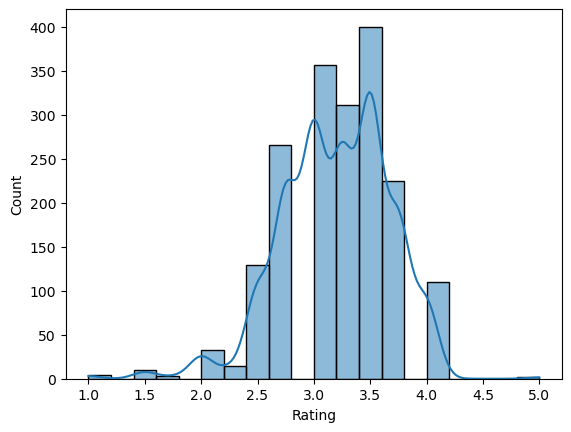

In [136]:
# create histogram to visualize the distribution of the variables. 

sns.histplot(df_cleaned_data['Rating'], bins = 20, kde = True)

In [128]:
# Create a Categorical Variable for Ratings

df_cleaned_data.loc[df_cleaned_data['Rating'] < 2.5, 'Rating Category'] = 'Low'
df_cleaned_data.loc[(df_cleaned_data['Rating'] >= 2.5) & (df_cleaned_data['Rating'] < 3.5), 'Rating Category'] = 'Medium'
df_cleaned_data.loc[df_cleaned_data['Rating'] >= 3.5, 'Rating Category'] = 'High'

In [132]:
df_cleaned_data['Rating Category'].value_counts(dropna = False)

Rating Category
Medium    1062
High       737
Low         64
Name: count, dtype: int64

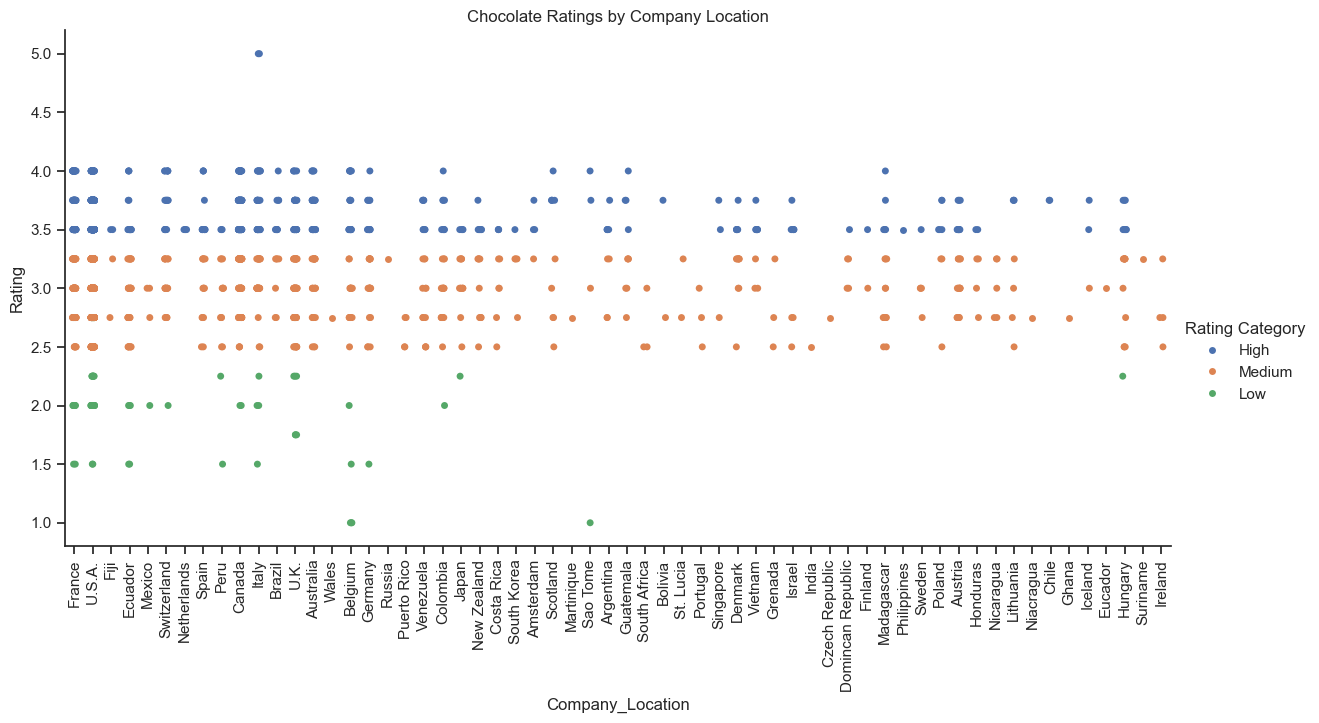

In [148]:
# Set Seaborn style
sns.set(style="ticks")

# Create the categorical plot
cat_plot = sns.catplot(x="Company_Location", y="Rating", hue="Rating Category", data=df_cleaned_data, height=6, aspect=2)

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Set title
plt.title("Chocolate Ratings by Company Location")

plt.show()

### Interpretation of the Categorical Plot:
##### Most Ratings Fall in "Medium" & "High" Categories:  Majority of chocolates are rated between 2.5 - 4.0 and there are few chocolates fall into the "Low" rating category (i.e. <2.5).
##### High-Rated Chocolates: Certain countries have more high-rated chocolates (blue dots).


# 4. Answers to Initial Questions

#### 1. What factors (e.g., cocoa percentage, bean origin) are most strongly associated with higher ratings?

Answer: Cocoa Percentage has a weak negative correlation with ratings (-0.14), suggesting that higher cocoa chocolates tend to receive slightly lower ratings.

#### 2. How do ratings differ across manufacturers or regions?

Answer: Different company locations shows varying rating distributions, where some countries consistently producing highly rated chocolates, while others shows mixed quality.

#### 3. Is there a correlation between the cocoa percentage in a chocolate bar and its rating?

Answer: Yes, but with a negative correlation (-0.14), indicating that cocoa content alone does not strongly determine ratings.

#### 4. Do chocolate bars from specific bean origin countries tend to receive higher ratings?

Answer: Not yet explored fully but company location analysis suggests some regions consistently produce higher-rated chocolates.

#### 5. Have ratings improved or declined over the years?

Answer: Slight positive correlation (0.11) suggests ratings have slightly increased over time.

#### 6. What specific regions or farms produce the highest-rated cacao beans?

Answer: Not yet explored

#### 7. Are certain regions dominated by specific manufacturers, and does this affect ratings?

Answer: Not yet explored fully but company location analysis suggests some regions consistently produce higher-rated chocolates, need more analysis.

# 5. New Questions

#### 1. Which bean origins produce the highest-rated chocolates?

#### 2. Do specific manufacturers consistently receive higher ratings?

#### 3. Do newer chocolates (recent years) have different cocoa percentages than older ones?

# 6. Hypotheses for Testing:

1. Higher cocoa percentage leads to lower ratings.
2. Certain bean origins produce higher-rated chocolates(Needs further analysis).
3. Chocolate ratings have improved over time.
4. Cacao bean type affects ratings(Not explored but could be helpful).